# Lecture 05: Matrix Approximation and Factorization

## Principal Component Analysis

Principal component analysis (PCA) is an **unsupervised** learning technique that attempts to learn simple representations of a dataset. Suppose $\{{\bf x}^{(i)}\}_{i=1}^N\subset\mathbb{R}^d$ is a collection of data, and that $X\in M_{N, d}$ is the associated data matrix with $i$th row equal to ${\bf x}^{(i)}$. Consider the program

$$
\min_{{\bf v}\in\mathbb{R}^d, {\bf c}\in\mathbb{R}^N}\sum_{i=1}^N \Vert {\bf x}^{(i)}-c_i{\bf v}\Vert^2.
$$

The idea is that we want to find a 1D subspace of $\mathbb{R}^d$, $\text{span}({\bf v})$, and coefficients $c_i$ that best approximates the data on average. 

As with many programs that involve blocks of parameters, is instructive to consider what happens when we leave certain blocks of parameters and attempt to optimize over the remaining parameters. For example, if we fix ${\bf v}$, then the optimization program splits into $N$ independent programs:

$$
\min_{{\bf c}\in\mathbb{R}^N}\sum_{i=1}^N \Vert {\bf x}^{(i)}-c_i{\bf v}\Vert^2 = \sum_{i=1}^N\min_{c_i} \Vert {\bf x}^{(i)}-c_i{\bf v}\Vert^2.
$$

From previous homework, we know that the optimal $c_i$ is given by projection onto $\text{span}({\bf v})$. Hence, $c_i = {\bf v}^T {\bf x}^{(i)}/\Vert{\bf v}\Vert^2$. This solves for $c_i$ in terms of just ${\bf v}$, so we can solve the original program by solving

$$
\min_{{\bf v}\in\mathbb{R}^d}\sum_{i=1}^N \left\Vert {\bf x}^{(i)}-\left({\bf v}^T{\bf x}^{(i)}/\Vert{\bf v}\Vert^2\right){\bf v}\right\Vert^2.
$$

This equivalent program motivates the substitution ${\bf u} = {\bf v}/\Vert {\bf v}\Vert$, so we get an equivalent constrained program of the form

$$
\min_{{\bf u}\in\mathbb{R}^d}\sum_{i=1}^N \left\Vert {\bf x}^{(i)}-\left({\bf u}^T{\bf x}^{(i)}\right){\bf u}\right\Vert^2\text{ subject to }\Vert {\bf u}\Vert^2=1.
$$

Now, 

$$
\left\Vert {\bf x}^{(i)}-\left({\bf u}^T{\bf x}^{(i)}\right){\bf u}\right\Vert^2 = \Vert {\bf x}^{(i)}\Vert^2 - 2{\bf u}^T{\bf x}^{(i)}{\bf u}^T{\bf x}^{(i)}+\left({\bf u}^T{\bf x}^{(i)}\right)^2\Vert {\bf u}\Vert^2=\Vert{\bf x}^{(i)}\Vert^2-\left({\bf u}^T{\bf x}^{(i)}\right)^2,
$$

and therefore we have another equivalent program 

$$
\max_{{\bf u}\in\mathbb{R}^d}\sum_{i=1}^N \left({\bf u}^T{\bf x}^{(i)}\right)^2 \text{ subject to }\Vert {\bf u}\Vert^2=1.
$$

Furthermore, we have

$$
\sum_{i=1}^N \left({\bf u}^T{\bf x}^{(i)}\right)^2=\sum_{i=1}^N {\bf u}^T{\bf x}^{(i)}\left({\bf x}^{(i)}\right)^T{\bf u}={\bf u}^T\left(\sum_{i=1}^N {\bf x}^{(i)}\left({\bf x}^{(i)}\right)^T\right){\bf u}= {\bf u}^T X^T X{\bf u}.
$$

Setting $A=X^TX$, we see that $A$ is symmetric positive semidefinite, and the equivalent program is

$$
\max_{{\bf u}\in\mathbb{R}^d}{\bf u}^T A{\bf u} \text{ subject to }\Vert {\bf u}\Vert^2=1.
$$

We see that the optimal ${\bf u}^\ast$ is therefore an eigenvector of $A$ with largest eigenvalue. This ${\bf u}^\ast$ is called the first **loading vector** and the optimal values $c_i^\ast=\left({\bf u}^\ast\right)^T {\bf x}^{(i)}$ are **PCA scores**. 

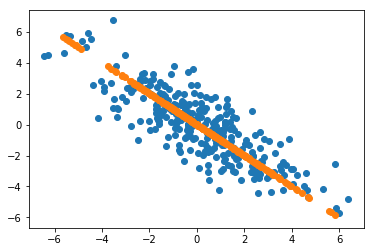

[ 52.04757701  16.22204529]
[[ 0.70587848 -0.70833295]
 [-0.70833295 -0.70587848]]


In [116]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

N = 300 # Number of data points

A = np.array([[2, -1], [-1, 2]])
data = np.reshape(rd.randn(N*2), (N,2)) @ A

U, S, Vt = np.linalg.svd(data)

rank_one_approximation = S[0]* np.outer(U[:,0], Vt[0,:])

plt.scatter(data[:,0], data[:,1])
plt.scatter(rank_one_approximation[:,0], rank_one_approximation[:,1])
plt.show()

print(S)
print(Vt)



## PCA with multiple components

We can rewrite the objective function for the first principal component in the form

$$
\min_{{\bf c}\in\mathbb{R}^N,{\bf v}\in\mathbb{R}^d}\Vert X - {\bf c}{\bf v}^T\Vert^2
$$

This form reveals that PCA is attempting to approximate the data matrix $X$ using a **factorization**. Since ${\bf c}{\bf v}^T$ is at most rank one, we say that the above is attempting to find a **rank-one approximation** to $X$. Replacing ${\bf c}$ with $C\in M_{N, k}$, and ${\bf v}^T$ with $V\in M_{k, d}$ with $k\leq d,N$, we can instead seek the solution to

$$
\min_{C\in M_{N, k}, V\in M_{k,d}}\Vert X - CV\Vert^2
$$

Again, we can leave $V$ fixed and see what $C$ need to be to be optimal. Let's assume that $V$ has rank $k$ (why is this okay?). It is also helpful to note that

$$
\Vert X - CV\Vert^2 = \text{trace}((X-CV)^T(X-CV))=\sum_{i=1}^d {\bf e}_i^T (X-CV)^T(X-CV){\bf e}_i,
$$

where the trace of a square matrix is the sum of its diagonal entries. Taking a partial derivative with respect to $c_{a, b}$, we have

$$
\frac{\partial}{\partial c_{a, b}}\Vert X - CV\Vert^2 = \sum_{i=1}^d \frac{\partial}{\partial c_{a, b}}\left({\bf e}_i^T (X-CV)^T(X-CV){\bf e}_i\right) = \sum_{i=1}^d {\bf e}_i^T \left(\frac{\partial}{\partial c_{a, b}}(X-CV)^T(X-CV)+(X-CV)^T\frac{\partial}{\partial c_{a, b}}(X-CV)\right){\bf e}_i.
$$

Noting that $\frac{\partial}{\partial c_{a, b}}C = {\bf e}_a{\bf e}_b^T$, we then have

$$
\frac{\partial}{\partial c_{a, b}}\Vert X - CV\Vert^2 = \sum_{i=1}^d {\bf e}_i^T\left(({\bf e}_a{\bf e}_b^TV)^T(CV-X)+(CV-X)^T{\bf e}_a{\bf e}_b^TV\right){\bf e}_i=2\sum_{i=1}^d \left({\bf e}_a^T(CV-X){\bf e}_i\right)\left({\bf e}_i^TV^T{\bf e}_b\right)=2{\bf e}_b^T\left(\sum_{i=1}^d (CV-X){\bf e}_i{\bf e}_i^T V^T\right){\bf e}_a.
$$

Finally, since $\sum_{i=1}^d{\bf e}_i{\bf e}_i^T=I$, we have that

$$
\frac{\partial}{\partial c_{a, b}}\Vert X - CV\Vert^2=2{\bf e}_b^T(CV-X)\left(\sum_{i=1}^d {\bf e}_i{\bf e}_i^T\right)V^T{\bf e}_a={\bf e}_b^T(CV-X)V^T{\bf e}_a.
$$

That is, the $(a, b)$th entry of the gradient of $\Vert X-CV\Vert$ is the $(a, b)$th entry of the matrix $2(CV-X)V^T$. Thus, the gradient with respect to $C$ is $2(CV-X)V^T$. The necessary conditions for optimality are

$$
CVV^T - XV^T = {\bf 0}
$$

and since $V$ has rank $k$, $VV^T$ is invertible, and we get that the only point satisfying the necessary conditions is $C=XV^T(VV^T)^{-1}$. It should be noted that 

$$
\min_{C\in M_{N, k}} \Vert X - CV\Vert^2.
$$

is a convex program, so we have found the solution to this program. We may therefore consider the program

$$
\min_{V\in M_{k, d}} \Vert X - X V^T(VV^T)^{-1}V\Vert^2.
$$

At this point, the **singular value decomposition** of a matrix becomes really useful.

#### Theorem: If $A\in M_{k, d}$ with $k\leq d$, then there exists orthogonal matrices $U\in M_{k,k}$ and $V\in M_{d, d}$, and values $\sigma_1\geq \sigma_2\geq \cdots\sigma_k\geq 0$ (the singular values of $A$) such that $A = U\Sigma V^T$ where $\Sigma\in M_{k,d}$ has the singular values of $A$ along its main diagonal, and all other entries are zero.

Just so we don't confuse ourselves, let's replace variables so that we are attempting to solve

$$
\min_{A\in M_{k, d}} \Vert X - X A^T(AA^T)^{-1}A\Vert^2.
$$

Now, the singular value decomposition gives us

$$
A^T(AA^T)^{-1}A =A^T(U\Sigma V^TV\Sigma^TU^T)^{-1}A=A^T(U\Sigma\Sigma^TU^T)^{-1}A=A^T(U^T)^{-1}(\Sigma\Sigma^T)^{-1}U^{-1}A = A^T U(\Sigma\Sigma^T)^{-1}U^T A = V\Sigma^T(\Sigma\Sigma^T)^{-1}\Sigma V^T = V E_k E_k^T V^T =V_kV_k^T
$$

where $E_k\in M_{d, k}$ is the matrix with $1$'s on the main diagonal and $0$'s everywhere else, and also where $V_k\in M_{d, k}$ is the matrix whose $k$ columns coincide with the first $k$ columns of $V$. Now, $A$ ranges over all matrices, so $V$ can range over any orthogonal matrix, and hence $V_k$ can range over any matrix whose $k$ columns are orthogonal. This last restriction can be stated as $V_k^T V_k = I\in M_{k, k}$. Therefore, we can instead solve the program

$$
\min_{Q\in M_{d, k}}\Vert X - XQQ^T\Vert^2 \text{ subject to }Q^TQ=I.
$$

Such a $Q$ is said to be a **rank $k$ projection**. In particular, $QQ^T$ projects onto the span of the columns of $Q$. We now observe that

$$
\Vert X - XQQ^T\Vert^2=\text{trace}\left((X-XQQ^T)(X-XQQ^T)^T\right)=\text{trace}\left(XX^T-XQQ^TX^T-XQQ^TX^T+XQQ^TQQ^TX^T)^T\right)=\text{trace}\left(XX^T-XQQ^TX^T-XQQ^TX^T+XQQ^TX^T)^T\right)=\text{trace}(XX^T)-\text{trace}(XQQ^TX^T)
$$

Since $\text{trace}(XX^T)$ is constant, we have the equivalent program

$$
\max_{Q\in M_{d, k}} \Vert X Q\Vert^2\text{ subject to } Q^TQ=I.
$$

Another way to phrase this is

$$
\max_{\{{\bf q}^{(j)}\}_{j=1}^k\subset\mathbb{R}^d}\sum_{j=1}^T \left({\bf q}^{(j)}\right)^TX^TX{\bf q}^{(j)}\text{ subject to }\{{\bf q}^{(j)}\}_{j=1}^k\text{ is orthonormal }.
$$

We now rely on a powerful result in matrix analysis to get us the rest of the way.

#### Theorem (Schur-Horn): Let $A\in M_{d,d}$ be a symmetric matrix with eigenvalues $\lambda_1\geq\lambda_2\geq\cdots\geq \lambda_d$, and let $\mu_1\geq\mu_2\geq\cdots\geq\mu_d$ satsify $\sum_{i=1}^d\lambda_i = \sum_{i=1}^d\mu_i$. There exists an orthonormal basis $\{{\bf u}^{(i)}\}_{i=1}^d\subset\mathbb{R}^d$ with $\mu_i=\left({\bf u}^{(i)}\right)^TA{\bf u}^{(i)}$ if and only if $\sum_{i=1}^k\mu_i\leq\sum_{i=1}^k\lambda_i$ for $k=1,\ldots, d$.

One consequence of the Schur-Horn theorem is that 

$$
\sum_{j=1}^T \left({\bf q}^{(j)}\right)^TX^TX{\bf q}^{(j)}\leq\sum_{i=1}^k \lambda_i(X^TX).
$$

where $\lambda_i(X^TX)$ are the eigenvalues of $X^TX$ in decreasing order. Using the SVD of $X=U\Sigma V^T$, we have that $X^T X=V\Sigma^T\Sigma V^T$, so the ordered eigenvalues of $X^TX$ are the squared singular valuse of $X$, and the eigenvectors of $X^TX$ are the columns of $V$. In particular, if we let $Q$ coincide with the first $k$ columns of $V$, we will have equality in the above inequality. Thus, we conclude that $Q^\ast = V_k$ is a solution to this program.

In particular, this shows that the best rank $k$ approximation to

$$
X = U \begin{pmatrix}
\sigma_1 & 0 & \cdots & 0 & 0 & \cdots & 0\\
0 & \sigma_2 & \cdots & 0 & 0 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots & \vdots &\ddots &\vdots\\
0 & 0 & \cdots & \sigma_k & 0 &\cdots & 0\\
0 & 0 & \cdots & 0 &\sigma_{k+1} & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots & \vdots &\ddots & \vdots\\
0 & 0 & \cdots & 0 & 0 &\cdots & \sigma_d\\
\vdots & \vdots & \ddots & \vdots & \vdots &\ddots & \vdots\\
0 & 0 & \cdots & 0 & 0 & \cdots & 0\\
\end{pmatrix} V^T
$$

is

$$
U \begin{pmatrix}
\sigma_1 & 0 & \cdots & 0 & 0 & \cdots & 0\\
0 & \sigma_2 & \cdots & 0 & 0 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots & \vdots &\ddots &\vdots\\
0 & 0 & \cdots & \sigma_k & 0 &\cdots & 0\\
0 & 0 & \cdots & 0 &0 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots & \vdots &\ddots & \vdots\\
0 & 0 & \cdots & 0 & 0 &\cdots & 0\\
\vdots & \vdots & \ddots & \vdots & \vdots &\ddots & \vdots\\
0 & 0 & \cdots & 0 & 0 & \cdots & 0\\
\end{pmatrix} V^T.
$$

In particular, the columns of $V$ are the **loading vectors** for PCA, and the rows of $XV_k$ are PCA scores for each of the data points.

It should also be noted that PCA often involves **mean-centering**, which removes the means of the data before performing a rank $k$ approximation. 


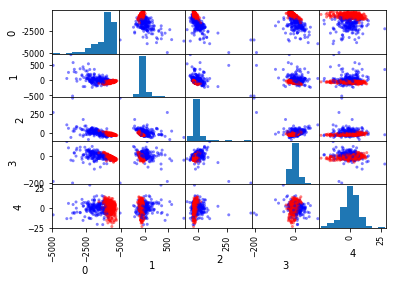

In [122]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer() # Loads the Wisconsin Breast Cancer dataset (569 examples in 30 dimensions)

# Parameters for the data
dim_data = 30
num_labels = 2
num_examples = 569

k = 5 # Rank of approximation

X = data['data'] # Data in rows
U, S,    = np.linalg.svd(X)
rank_k_appx = pd.DataFrame(U[:,:k] * S[:k]) # First ten PCA scores for each data point
targets = data.target # 0-1 labels
clrs = []
for i in range(len(targets)):
    if targets[i] == 0:
        clrs.append([0, 0, 1])
    else:
        clrs.append([1, 0, 0])
        
pd.plotting.scatter_matrix(rank_k_appx, color=clrs)
plt.show()


## Nuclear Norm Minimization

One immediate question is, how to we pick the rank of the approximation? We can do this using standard validation procedures, but there is another way to select the rank automatically. This involes **nuclear norm minimization**

$$
\min_{Y\in M_{m,n}} \Vert Y\Vert_\ast\text{ subject to } \Vert X- Y\Vert\leq\delta
$$

where $\Vert Y\Vert_\ast = \sum_{i=1}^{\min(m,n)}\sigma_i(Y)$ and $\sigma_i(Y)$ is the $i$th singular value of $Y$. Additionally, $\delta$ represents some error threshold. It turns out that this program is convex, and has good theoretical properties:

#### Recht, B., Fazel, M., & Parrilo, P. A. (2010). Guaranteed minimum-rank solutions of linear matrix equations via nuclear norm minimization. SIAM review, 52(3), 471-501.

Specialized iterative methods have been developed to quickly solve such programs:

#### Cai, J. F., Candès, E. J., & Shen, Z. (2010). A singular value thresholding algorithm for matrix completion. SIAM Journal on Optimization, 20(4), 1956-1982.

This last paper concerns the **matrix completion** problem, which we will explore next.


## Low Rank Matrix Completion

Consider a data matrix $X\in M_{N, d}$, but suppose that some of the entries are missing. For example, this can occur in survey data. In order to process $X$, it is often useful to complete the matrix to include guesses to these entries. This is known as **data imputation** in statistics. One way to do this is the following:

$$
\min_{C\in M_{N, k}, V\in M_{k, d}} \sum_{a=1}^M\left(x_{i_a, j_a} - {\bf e}_{i_a}^T CV{\bf e}_{j_a}\right)^2
$$

where $\{(i_a, j_a)\}_{a=1}^M$ are the indices of the observed entries of $X$. If we fix $V$, we have

$$
\frac{\partial}{\partial c_{s, t}}\sum_{a=1}^M\left(x_{i_a, j_a} - {\bf e}_{i_a}^T CV{\bf e}_{j_a}\right)^2=2\sum_{a=1}^M \left({\bf e}_{i_a}^T {\bf e}_s{\bf e}_t^TV{\bf e}_{j_a}\right)\left({\bf e}_{i_a}^T CV{\bf e}_{j_a}-x_{i_a, j_a}\right)=2 {\bf e}_{s}^T \left(\sum_{a=1}^M \left({\bf e}_{i_a}^T CV{\bf e}_{j_a}-x_{i_a, j_a}\right){\bf e}_{i_a}{\bf e}_{j_a}^T\right)V^T{\bf e}_{t}.
$$

Thus, the $C$-gradient of the objective is 

$$
2\left(\sum_{a=1}^M \left({\bf e}_{i_a}^T CV{\bf e}_{j_a}-x_{i_a, j_a}\right){\bf e}_{i_a}{\bf e}_{j_a}^T\right)V^T
$$

Note that 

$$
\sum_{a=1}^M \left({\bf e}_{i_a}^T CV{\bf e}_{j_a}-x_{i_a, j_a}\right){\bf e}_{i_a}{\bf e}_{j_a}^T
$$

is $CV-X$ for the known entries of $X$, and $0$ in all other entries.

We see that the necessary conditions for optimality entail a somewhat complicated system of linear equations. Moreover, the conditions for ensure uniqueness of the solution to this system of linear equations is complicated as well. This means that this program is a good candidate for a numerical method.

The first thing we note is that this program never has a unique solution since $CV = (\alpha C)(\alpha^{-1}V)$ for any scalar $\alpha\not=0$. To overcome this we add in **regularization terms**:

$$
\min_{C\in M_{N, k}, V\in M_{k, d}} \sum_{a=1}^M\left(x_{i_a, j_a} - {\bf e}_{i_a}^T CV{\bf e}_{j_a}\right)^2 +\frac{\lambda_C}{2}\Vert C\Vert^2 + \frac{\lambda_V}{2}\Vert V\Vert^2,
$$

where $\lambda_C,\lambda_V>0$ are hyperparameters. 

**Alternating minimization** is a standard technique that can sometimes be used to speed up a program. Letting

$$
f(C, V) = \frac{1}{2}\sum_{a=1}^M\left(x_{i_a, j_a} - {\bf e}_{i_a}^T CV{\bf e}_{j_a}\right)^2 +\frac{\lambda_C}{2}\Vert C\Vert^2 + \frac{\lambda_V}{2}\Vert V\Vert^2
$$

we have that

$$
D_C f(C, V) = \left(\sum_{a=1}^M \left({\bf e}_{i_a}^T CV{\bf e}_{j_a}-x_{i_a, j_a}\right){\bf e}_{i_a}{\bf e}_{j_a}^T\right)V^T + \lambda_C C
$$

and

$$
D_V f(C, V) = C^T\left(\sum_{a=1}^M \left({\bf e}_{i_a}^T CV{\bf e}_{j_a}-x_{i_a, j_a}\right){\bf e}_{i_a}{\bf e}_{j_a}^T\right) + \lambda_V V
$$

In [2]:
# Initialize backtracking and block backtracking

import numpy as np

def backtracking(x0, dx, f, df0, alpha=0.1, beta=0.5, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    

    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn])
        plt.show()
        
        return x
    
    else:
        return x
    
def update_blocks(x,y,t):
    # An auxiliary function for backtracking with blocks of variables
    num_blocks = len(x)
    z = [None]*num_blocks
    for i in range(num_blocks):
        z[i] = x[i] + t*y[i]
    return z
     
def block_backtracking(x0, dx, f, df0, alpha=0.1, beta=0.5, verbose=False):
    num_blocks = len(x0)
    
    delta = 0
    for i in range(num_blocks):
        delta = delta + np.sum(dx[i] * df0[i])
    delta = alpha * delta
    
    f0 = f(x0)
    
    t = 1
    x = update_blocks(x0, dx, t)
    fx = f(x)
    while (not np.isfinite(fx)) or f0+t*delta<fx:
        t = beta*t
        x = update_blocks(x0, dx, t)
        fx = f(x)
        
    if verbose:
        print((t, delta))
        l=-1e-5
        u=1e-5
        s = np.linspace(l, u, 64)
        fs = np.zeros(s.size)
        crit = f0 + s*delta
        tan = f0 + s*delta/alpha
        for i in range(s.size):
            fs[i] = f(update_blocks(x0, dx, s[i]))
        plt.plot(s, fs)
        plt.plot(s, crit, '--')
        plt.plot(s, tan, '.')
        plt.scatter([0], [f0])
        plt.show()
            
    return x, fx

Time to read data: 0.046401
Step 0, Value 516549132.639990, AM Value: 516549132.639990
Step 50, Value 235477.203709, AM Value: 100336.921985
Step 100, Value 76984.944769, AM Value: 40507.309657
Step 150, Value 43417.393065, AM Value: 26641.006166
Step 200, Value 31794.513263, AM Value: 20789.982359
Step 250, Value 25864.291981, AM Value: 17801.474683
Step 300, Value 22222.558022, AM Value: 15975.924179
Step 350, Value 19745.421267, AM Value: 14776.854536
Step 400, Value 17939.660943, AM Value: 13931.786593
Step 450, Value 16591.433989, AM Value: 13286.662436
Step 500, Value 15546.275662, AM Value: 12793.049006
Step 550, Value 14711.110540, AM Value: 12402.529703
Step 600, Value 14037.095872, AM Value: 12077.363633
Step 650, Value 13482.425520, AM Value: 11796.240574
Step 700, Value 13031.205584, AM Value: 11552.256954
Step 750, Value 12632.883682, AM Value: 11339.048728
Step 800, Value 12281.890916, AM Value: 11147.958885
Step 850, Value 11968.413394, AM Value: 10973.265656
Step 900, V

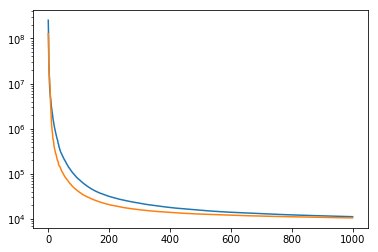

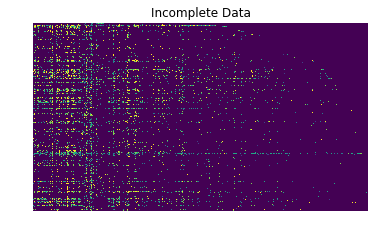

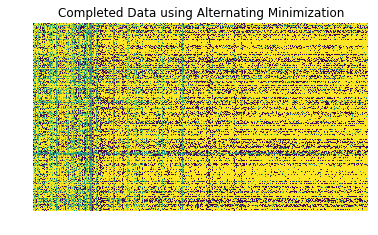

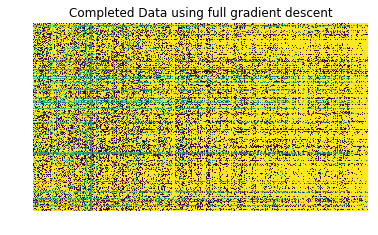

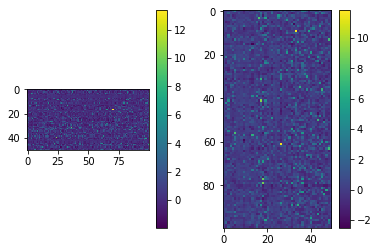

Minimal value of product: -65.713883


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import scipy.sparse as sp
import pandas as pd
from timeit import default_timer as timer

rd.seed(1234)


# The Movie Lens 100k dataset consists of 100k ratings from 943 users on 1682 movies
# Note that 943 * 1682 = 1586126, so over 90% of the dataset is "missing"
start = timer()
df = pd.read_csv('./ml-100k/u.data', delim_whitespace=True, header=None)
end = timer()

print('Time to read data: %f' % (end-start))

# Note that the user/movie indices begin at 1 so we need to shift to 0 indexing
data = np.array(df[2])
i = df[0]-1
j = df[1]-1

m = 943
n = 1682
X = sp.coo_matrix((data, (i, j)), shape=(m, n))

lC = 1e-3
lV = 1e-3

g_data = lambda C, V: (C@V)[i,j]
g = lambda C, V: sp.coo_matrix((g_data(C, V), (i, j)), shape=(m,n))

f = lambda C, V: (np.sum((g_data(C, V) - data)**2) + lC*np.sum(C**2) + lV*np.sum(V**2))/2
dCf = lambda C, V: (g(C,V)-X)@V.T + lC*C
dVf = lambda C, V: C.T@(g(C,V)-X) + lV*V

k=100

# Draw data from chi-square
C_opt = np.reshape(rd.randn(m*k)**2, (m, k))
V_opt = np.reshape(rd.randn(k*n)**2, (k, n))

C_am = np.zeros((m, k))
V_am = np.zeros((k, n))
C_am[:,:] = C_opt[:,:]
V_am[:,:] = V_opt[:,:]

# Setup for block form
x = [C_opt, V_opt]
f_block = lambda x: f(x[0], x[1])

iters = 1000
f_vals = np.zeros(iters)
f_vals_am = np.zeros(iters)

for it in range(iters):
    if (it)%50 == 0:
        print('Step %d, Value %f, AM Value: %f' % (it, f_block(x), f(C_am, V_am)))
        
    df0_block = [dCf(x[0], x[1]), dVf(x[0], x[1])]
    dx = [-df0_block[0], -df0_block[1]]
    x, fx = block_backtracking(x, dx, f_block, df0_block)
    
    fC = lambda C: f(C, V_am)
    dfC0 = dCf(C_am, V_am)
    C_am = backtracking(C_am, -dfC0, fC, dfC0)
    
    fV = lambda V: f(C_am, V)
    dfV0 = dVf(C_am, V_am)
    V_am = backtracking(V_am, -dfV0, fV, dfV0)
    
    f_vals[it] = fx
    f_vals_am[it] = f(C_am, V_am)
    
    #print(f_vals[it])

plt.semilogy(f_vals)
plt.semilogy(f_vals_am)
plt.show()

plt.imshow(X.todense(), clim=[0,5])
plt.axis('off')
plt.title('Incomplete Data')
plt.show()

plt.imshow(C_am @ V_am, clim=[0,5])
plt.axis('off')
plt.title('Completed Data using Alternating Minimization')
plt.show()

plt.imshow(x[0] @ x[1], clim=[0,5])
plt.axis('off')
plt.title('Completed Data using full gradient descent')
plt.show()

plt.subplot(1,2,1)
plt.imshow(x[0][:50,:])
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(x[1][:,:50])
plt.colorbar()
plt.show()

print('Minimal value of product: %f' % (np.min(x[0]@x[1], axis=None)))


## Interpretation of low-rank factorization

What does the factorization $CV$ mean? The rows of $C$ are in correspondence with the rows of $X$, so we can interpret the rows of $C$ as a representation of the rows of $X$ via features which are rows of $V$. Thus, we view each user profile in the MovieLens dataset as a mixture of the rows of $V$. Each row of $V$ can be interpreted as an "ideal" profile with particular opinions about various films. 

However, the existence of negative values makes these interpretations a little more difficult to follow. Ideally, since the entries of $X$ take on values between $1$ and $5$, we should at least be able to find a $C$ and $V$ with positive entries that approximates the known data in $X$. This would also assist applications that require interpretability. 

## Non-negative matrix factorization

Let's consider approximating a matrix $X$ using $CV$, but where $C$ and $V$ have non-negative entries. This is called **non-negative matrix factorization**. 

It is useful to consider what we need to update a single row of $C$:

$$
\min_{{\bf c}} \frac{1}{2}\Vert {\bf x} - {\bf c} V\Vert^2\text{ subject to } c_i\geq 0, i=1,\ldots, k
$$

We can solve this using known techniques, but  $g:\mathbb{R}^k\times\mathbb{R}^k\rightarrow\mathbb{R}$ by 

$$
g({\bf c},{\bf c}^{(0)}) = \frac{1}{2}\Vert {\bf x} - {\bf c}^{(0)}V\Vert^2 + ({\bf c}^{(0)}V-{\bf x})V^T({\bf c}-{\bf c}^{(0)})^T + \frac{1}{2}({\bf c}-{\bf c}^{(0)}) A({\bf c}-{\bf c}^{(0)})^T
$$

where $A = \text{diag}\left({\bf c}^{(0)}VV^T // {\bf c}^{(0)}\right)$ and $//$ indicates entrywise division.

#### Proposition: $g({\bf c},{\bf c}^{(0)})\geq \frac{1}{2}\Vert {\bf x} - {\bf c} V\Vert^2$ for all ${\bf c},{\bf c}^{(0)}\in\mathbb{R}^k$, and $g({\bf c}^{(0)},{\bf c}^{(0)})=\frac{1}{2}\Vert {\bf x} - {\bf c}^{(0)} V\Vert^2$.

This property allows us to define a very nice procedure for minimizing $\frac{1}{2}\Vert {\bf x} - {\bf c} V\Vert^2$. When a function $G({\bf a}, {\bf b})\geq F({\bf a})$ and $G({\bf b}, {\bf b})=F({\bf b})$, we say that $G$ **majorizes** $F$. The thing to note is that if we solve

$$
\min_{{\bf a}} G({\bf a}, {\bf b}),
$$

with ${\bf a}^\ast$, then 

$$
F({\bf a}^\ast)\leq G({\bf a}^\ast,{\bf b})\leq G({\bf b}, {\bf b})=F({\bf b}).
$$

Thus, the sequence

$$
{\bf a}^{(k+1)} = \arg\min_{{\bf a}} G({\bf a},{\bf a}^{(k)})
$$

will satisfy $F({\bf a}^{(k+1)})\leq F({\bf a}^{(k)})$. This is the **majorization-minimization** algorithm, and we will discuss it further next lecture.

Now, taking the Jacobian of $g$ with respect to ${\bf c}$ gives us

$$
({\bf c}^{(0)}V - {\bf x})V^T + ({\bf c}-{\bf c}^{(0)})A.
$$

Assuming $A$ is positive definite, we then have that ${\bf c}^\ast = {\bf c}^{(0)}+({\bf x}-{\bf c}^{(0)}V)V^TA^{-1}$ minimizes $g({\bf c}, {\bf c}^{(0)})$. Moreover,

$$
{\bf c}^\ast = {\bf c}^{(0)}+{\bf x}V^TA^{-1}-{\bf c}^{(0)}= {\bf c}^{(0)}\odot ({\bf x}V^T) // ({\bf c}^{(0)}VV^T)
$$

where $\odot$ represent elementwise multiplication. We also see that this preserves positive data. That is, if ${\bf x}$, $V$, and ${\bf c}^{(0)}$ have all positive entries, then so will ${\bf c}^\ast$. 

This derivation follows 

#### Lee, D. D., & Seung, H. S. (2001). Algorithms for non-negative matrix factorization. In Advances in neural information processing systems (pp. 556-562).

In particular, Lee and Seung show that the $A$ matrix is in fact positive definite.



At iteration 0, Value: 4737036.029368, Residuals: 263716.195408, 40868.494442
At iteration 100, Value: 155594.001139, Residuals: 0.003695, 6.979621
At iteration 200, Value: 103145.354525, Residuals: 0.000789, 1.508872
At iteration 300, Value: 86114.526808, Residuals: 0.000330, 0.634117
At iteration 400, Value: 77622.316681, Residuals: 0.000177, 0.341569
At iteration 500, Value: 72421.643307, Residuals: 0.000113, 0.219267
At iteration 600, Value: 68905.240105, Residuals: 0.000078, 0.148418
At iteration 700, Value: 66366.404308, Residuals: 0.000057, 0.106217
At iteration 800, Value: 64446.195756, Residuals: 0.000043, 0.079750
At iteration 900, Value: 62944.569684, Residuals: 0.000034, 0.061655
At iteration 1000, Value: 61749.054812, Residuals: 0.000027, 0.048818
At iteration 1100, Value: 60766.900406, Residuals: 0.000022, 0.039464
At iteration 1200, Value: 59933.570912, Residuals: 0.000019, 0.032997
At iteration 1300, Value: 59219.657933, Residuals: 0.000016, 0.028272
At iteration 1400, 

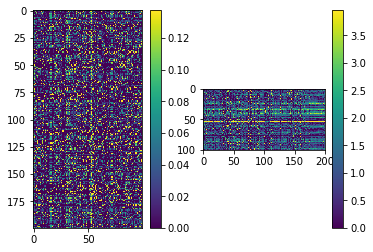

In [105]:
# For simplicity, we use our imputed data, but set all values <=1 to 1

X_imp = C_am @ V_am

X_imp[X_imp<1] = 1

iters = 10000

k=100

C = np.reshape(rd.randn(m*k)**2, (m, k))
V = np.reshape(rd.randn(k*n)**2, (k, n))
C_old = C
V_old = V

for it in range(iters):
    C = C * ((X_imp@V.T)/(C@V@V.T))
    V = ((C.T@X_imp)/(C.T@C@V)) * V
    fval = np.sum((X_imp-C@V)**2)/2
    cres = np.sum((C-C_old)**2)
    vres = np.sum((V-V_old)**2)
    C_old = C
    V_old = V
    if it%100 == 0:
        print('At iteration %d, Value: %f, Residuals: %f, %f' % (it, fval, cres, vres))
    
plt.subplot(1,2,1)
u = np.percentile(C, 95)
l = np.percentile(C, 5)
plt.imshow(C[:200,:], clim=(l,u))
plt.colorbar()

plt.subplot(1,2,2)
u = np.percentile(V, 95)
l = np.percentile(V, 5)
plt.imshow(V[:,:200], clim=(l,u))
plt.colorbar()
plt.show()